In [1]:
# benefit of hierarchical clusters is that you do not need to know the nubmer of clusters 
# up front



In [2]:
# read data
import pandas as pd

# define the path. This is a car data set
automobile = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/mtcars.csv')

In [3]:
automobile.head()
# All columns are numerical except model, vs, am. vs, am are binary variables (0 or 1)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Check if missing values are in the dataset
automobile.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [5]:
# preprocess data

# select numerical columns used to perform cluster analysis
x = automobile[['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']]

In [6]:
# Standardize features
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Apply the scaler
automobile_std = scaler.fit_transform(x)
automobile_std

array([[ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -6.20166581e-01,
        -7.89600577e-01,  4.30331483e-01,  7.46967077e-01],
       [ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -3.55382189e-01,
        -4.71201785e-01,  4.30331483e-01,  7.46967077e-01],
       [ 4.56736599e-01, -1.24445674e+00, -1.00602601e+00,
        -7.95569902e-01,  4.81584062e-01, -9.31677630e-01,
         4.32823359e-01,  4.30331483e-01, -1.14010764e+00],
       [ 2.20729683e-01, -1.06667720e-01,  2.23615417e-01,
        -5.43654869e-01, -9.81576392e-01, -2.33633287e-03,
         9.04735855e-01, -9.46729262e-01, -1.14010764e+00],
       [-2.34426513e-01,  1.03112130e+00,  1.05977159e+00,
         4.19549669e-01, -8.48561806e-01,  2.31296954e-01,
        -4.71201785e-01, -9.46729262e-01, -5.11082737e-01],
       [-3.35572334e-01, -1.06667720e-01, -4.69056970e-02,
        -6.17747526e-01, -1.58964307e+00,  2.520643

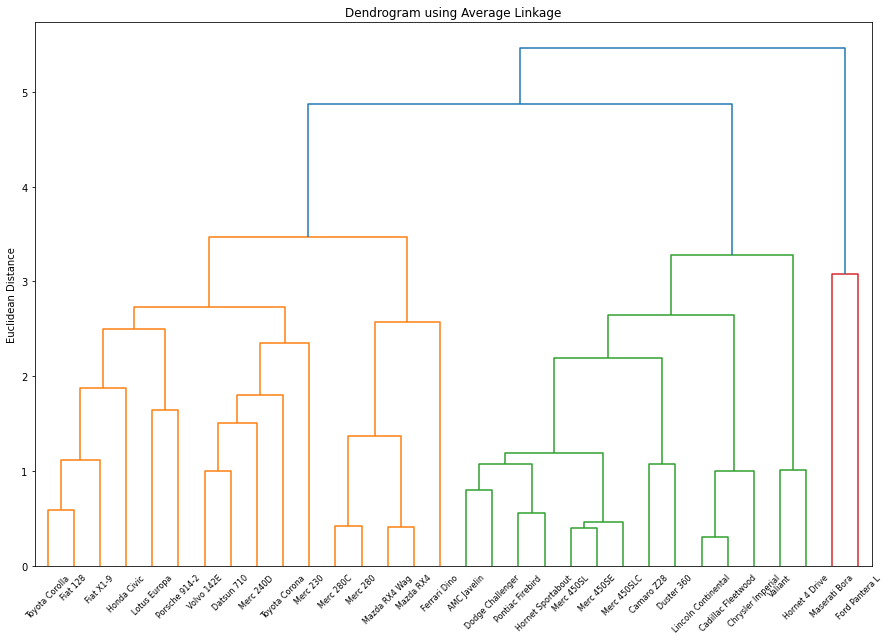

In [9]:
# Create dendogram using average linkage

# Import required libraries
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
# Types of linkage include average, single, complete, ward. Different linkage types give 
# different linkage

# Average linkage merges the cluster pairs based on the minimum average distances between
# all group members between clusters
linked = linkage(automobile_std, 'average')

plt.figure(figsize=(15,10))
 # Create dendrogram, [object, orientation, label for x axis, max distance]
dendrogram(linked, orientation = 'top', labels = np.array(automobile['model']),
          distance_sort = 'descending')

plt.ylabel ('Euclidean Distance')
plt.title ('Dendrogram using Average Linkage')
plt.show()

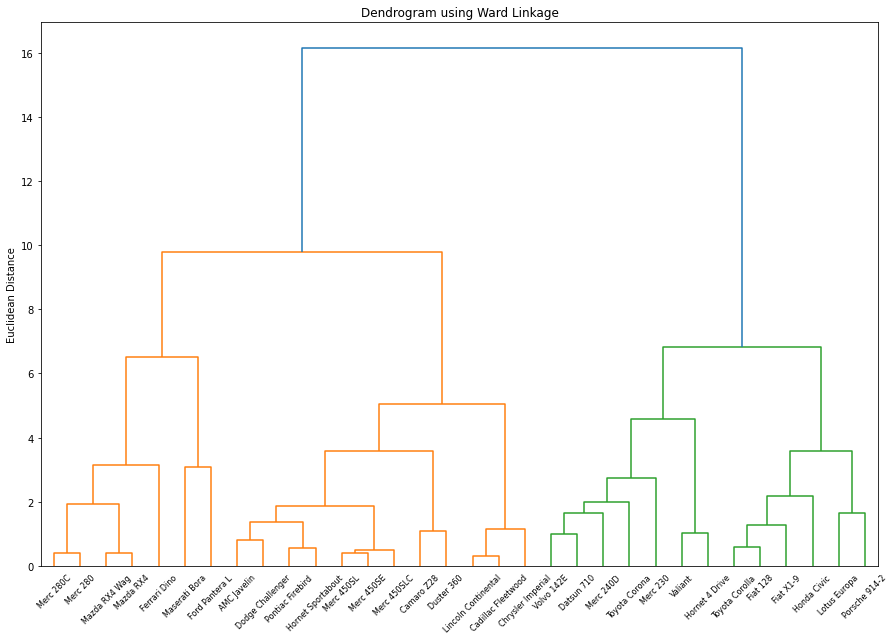

In [10]:
# Create dendrogram using ward linkage
# Ward linkage merges the cluster pairs that lead to the minimum increase in within
# cluster SSE
linked = linkage(automobile_std, 'ward')

plt.figure(figsize=(15,10))
 # Create dendrogram, [object, orientation, label for x axis, max distance]
dendrogram(linked, orientation = 'top', labels = np.array(automobile['model']),
          distance_sort = 'descending')

plt.ylabel ('Euclidean Distance')
plt.title ('Dendrogram using Ward Linkage')
plt.show()